In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [10]:
file_path = r'C:\Users\HP USER\Desktop\Data\superstore_dataset2011to2015.csv'  # Replace with the actual file path

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If decoding with UTF-8 fails, you can try a different encoding
    df = pd.read_csv(file_path, encoding='latin-1')

C:\Users\HP USER\AppData\Local\Temp\ipykernel_12668\195139838.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


### Data Cleaning

In [11]:
df.head(5)#.columns.tolist()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433.0,AG-2011-2040,01/01/2011,06/01/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253.0,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883.0,HU-2011-1220,01/01/2011,05/01/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731.0,IT-2011-3647632,01/01/2011,05/01/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255.0,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [12]:
dup = df.duplicated()
df[dup]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [13]:
mv = df.isnull().any()
mv

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  float64
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9995 non-null   object 
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [15]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  float64       
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9995 non-null   object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Data Analysis 


#### 1.	Order and Sales Analysis:
    - What is the overall trend in sales over time?
    - Which categories contribute the most to total sales?
    - Are there any seasonal patterns in sales?
    - What was the best month for sales and how much was earned?

In [16]:
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

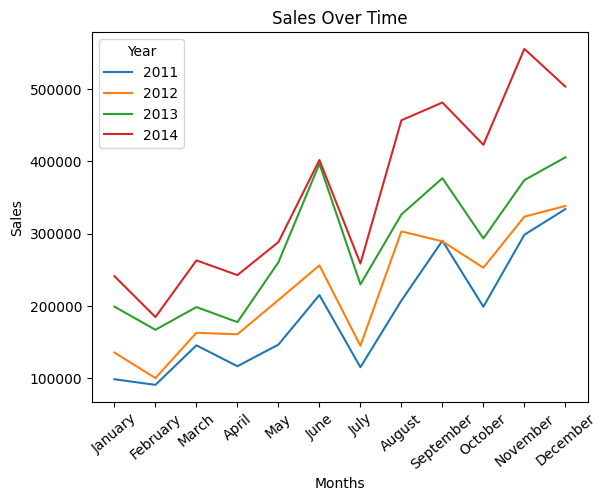

In [272]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month Name'] = pd.Categorical(df['Month Name'], categories = month_order, ordered = True)
line = df.groupby(['Year', 'Month Name'], as_index = False)['Sales'].sum()
line_pivot = line.pivot(index = 'Month Name', columns = 'Year', values = 'Sales')
#line_pivot = line_pivot.reindex(month order)
line_pivot.plot()
plt.title('Sales Over Time')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(range(len(month_order)), month_order, rotation = 40)
plt.show()


Category
Furniture          4110874.19
Office Supplies    3787070.23
Technology         4744557.50
Name: Sales, dtype: float64


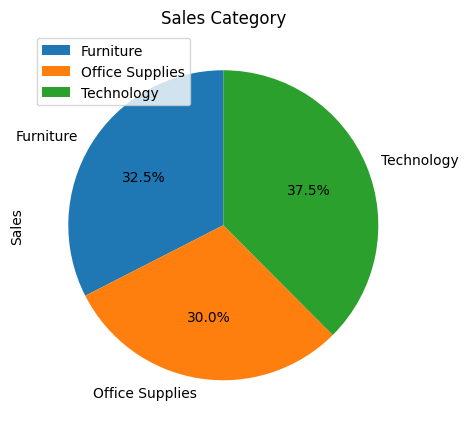

In [337]:
Category = df.groupby('Category')['Sales'].sum()
print(round(Category, 2))
Category.plot(kind = 'pie', autopct='%1.1f%%', figsize=(5, 6), startangle=90) 
plt.title('Sales Category') 
plt.legend(labels=Category.index, loc='upper left') 

0      675133.67
1      543739.38
2      770500.94
3      698561.21
4      904012.34
5     1269716.75
6      749381.84
7     1293833.17
8     1437380.11
9     1168184.39
10    1551277.34
11    1580780.77
Name: Sales, dtype: float64


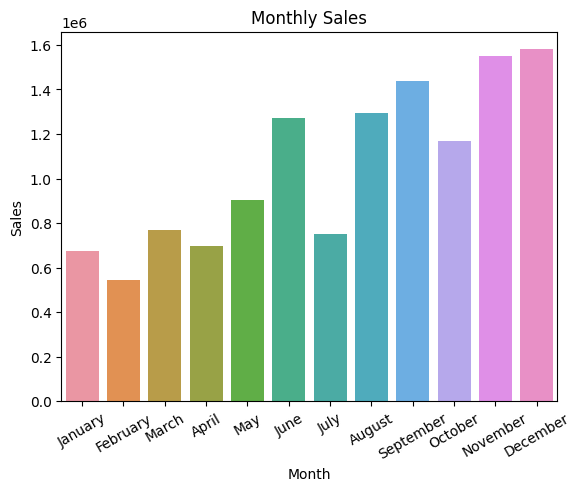

In [338]:
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
m_plot = df.groupby('Month')['Sales'].sum().reset_index()
sns.barplot(x = 'Month' , y = 'Sales', data = m_plot)
plt.xticks(range(12), month_name, rotation = 30)
plt.title('Monthly Sales')
print(round(m_plot['Sales'], 2))

#### Customer Analysis:
    - Who are the top customers based on total sales?
    - What is the distribution of customers across different segments and regions?
    - Are there any patterns in customer behavior based on order frequency or quantity purchased?
    - What date should advertisement displayed to maximize the likelihood of customers buying products?

Text(0.5, 1.0, 'Customer Sales')

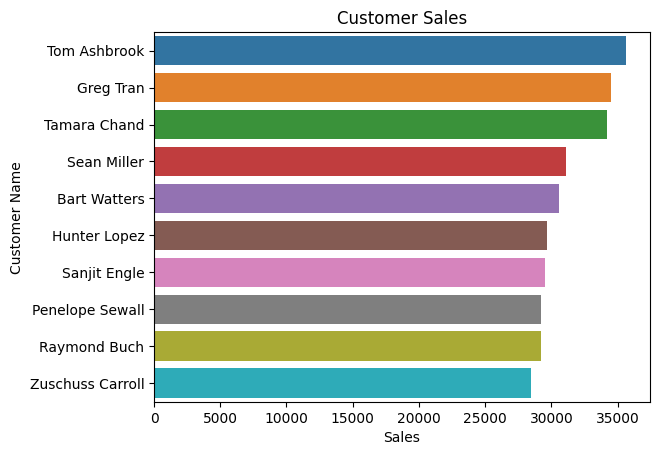

In [289]:
Cust =df.groupby(['Customer Name', 'Customer ID'])['Sales'].sum()
Top_Customers = Cust.sort_values(ascending = False).head(10).reset_index()
Top_Customers
sns.barplot(x = 'Sales', y = 'Customer Name', data = Top_Customers)
plt.title('Customer Sales')

Segment         Consumer  Corporate  Home Office
Region                                          
Africa              2381       1312          894
Canada               202        110           72
Caribbean            828        507          355
Central             5782       3321         2014
Central Asia        1042        613          393
EMEA                2538       1574          917
East                1469        877          502
North               2468       1487          830
North Asia          1170        708          460
Oceania             1837       1053          597
South               3479       1998         1168
Southeast Asia      1650        909          570
West                1672        960          571


Text(0, 0.5, 'Sales')

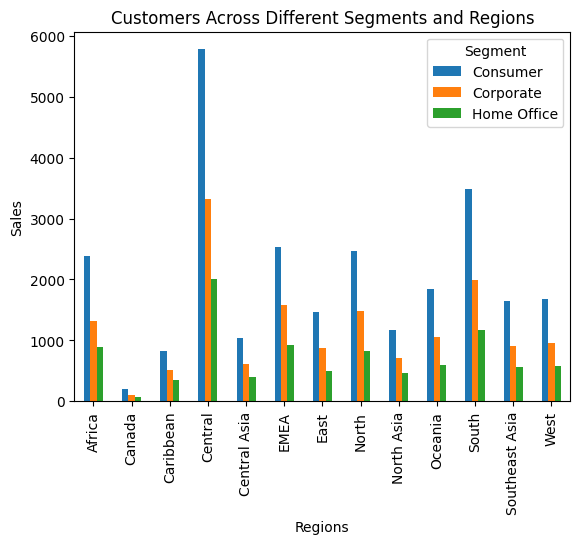

In [203]:
cross_t = pd.crosstab(df['Segment'],df['Region'])
print(cross_t.transpose())
cross_t.transpose().plot(kind = 'bar')
plt.title('Customers Across Different Segments and Regions')
plt.xlabel('Regions')
plt.ylabel('Sales')

Text(0.5, 1.0, 'Customer_Behavior')

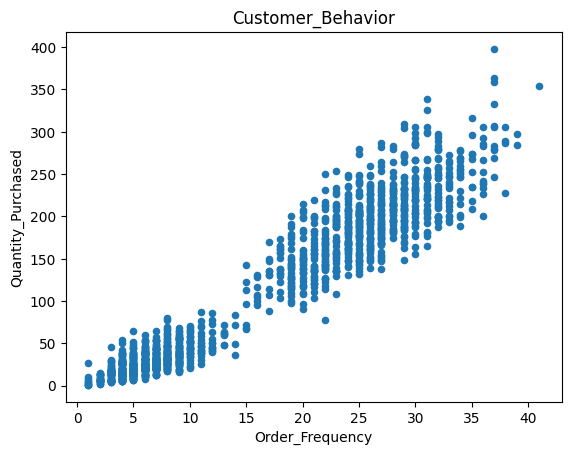

In [23]:
order_frequency = df.groupby ('Customer ID')['Order ID'].nunique()
quantity_purchased = df.groupby ('Customer ID')['Quantity'].sum()
customer_behavior = pd.concat([order_frequency, quantity_purchased], axis = 1)
customer_behavior.columns = ['Order_Frequency', 'Quantity_Purchased']
customer_behavior.plot(kind = 'scatter', x = 'Order_Frequency', y = 'Quantity_Purchased')
plt.title ('Customer_Behavior')

Text(0.5, 1.0, 'Sales Date')

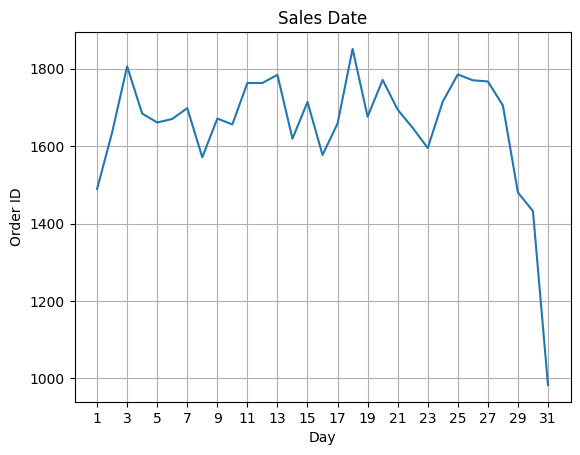

In [294]:
df['Day'] = df['Order Date'].dt.day
days = df.groupby('Day')['Order ID'].count().reset_index()
sns.lineplot(x = 'Day', y= 'Order ID', data = days)
plt.xticks(np.arange(1, 32, 2))
plt.grid(True)
plt.title('Sales Date')

#### Shipping Analysis:
    - What are the most common shipping modes used?
    - Is there a correlation between shipping mode and delivery times?
    - How does shipping cost vary across different regions segments?

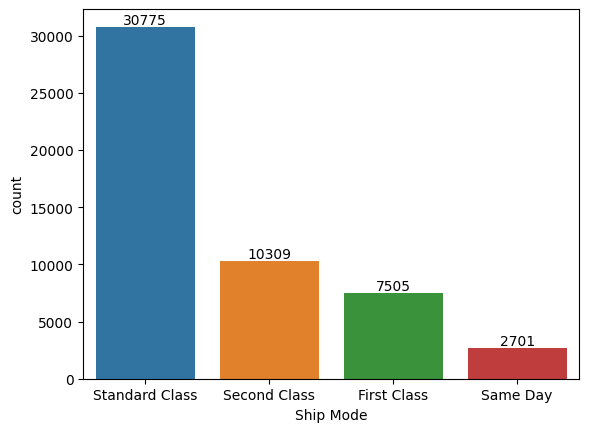

In [262]:
ship = df['Ship Mode'].value_counts().reset_index()
import seaborn as sns
ship_mode = sns.barplot(x = 'Ship Mode', y = 'count', data = ship)
for bars in ship_mode.containers:
    ship_mode.bar_label(bars)

In [94]:
df['Delivery Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df.groupby ('Ship Mode')['Delivery Duration'].agg(['mean', 'median']).reset_index()

,Ship Mode,mean,median
0,First Class,2.181746,2.0
1,Same Day,0.037394,0.0
2,Second Class,3.230187,3.0
3,Standard Class,4.998018,5.0


In [29]:
df['Ship Mode Encoded'] = df['Ship Mode'].astype('category').cat.codes
df[['Ship Mode Encoded', 'Delivery Duration']].corr()

,Ship Mode Encoded,Delivery Duration
Ship Mode Encoded,1.00000,0.71934
Delivery Duration,0.71934,1.00000


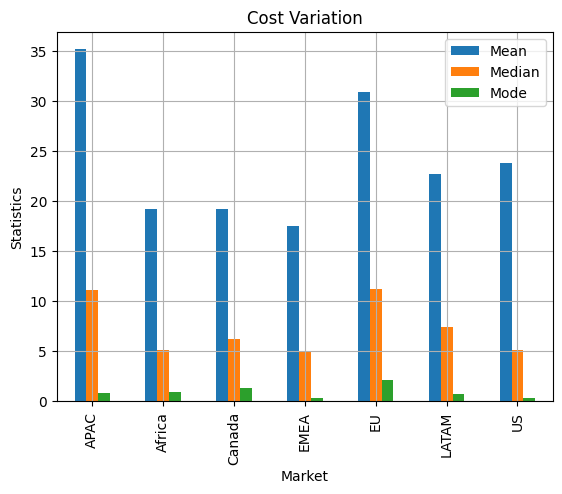

In [263]:
Statistics = df.groupby ('Market')['Shipping Cost']\
.agg(['mean', 'median', lambda x: x.mode().iloc[0]])
Statistics.columns = [ 'Mean', 'Median', 'Mode']
Statistics.plot.bar()
plt.title('Cost Variation')
plt.ylabel('Statistics')
plt.grid(True)

#### Profit and Cost Analysis:
    - Which products or categories have the highest and lowest profit margins?
    - Are there any trends or patterns in discounts and their impact on profit?

          Category        Profit
0        Furniture  285204.72380
1  Office Supplies  518473.83430
2       Technology  663778.73318


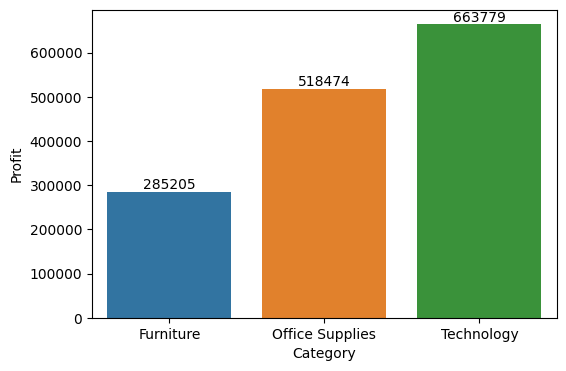

In [32]:
Category = df.groupby ('Category')['Profit'].sum().reset_index()
print(Category)
plt.figure(figsize = [6,4])
b = sns.barplot(x= 'Category', y = 'Profit', data = Category)
for bars in b.containers:
    b.bar_label(bars)

          Discount   Profit
Discount   1.00000 -0.31649
Profit    -0.31649  1.00000


<Axes: xlabel='Discount', ylabel='Profit'>

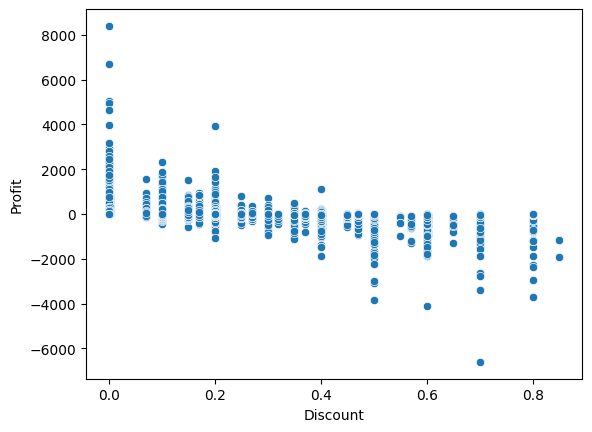

In [96]:
trend = df[['Discount', 'Profit']]
corr = trend.corr()
print(corr)
sns.scatterplot(x = 'Discount', y = 'Profit', data = trend)

#### Geographical Analysis:
    - What are the top regions or countries in terms of sales and profit?
    - Are there any regions with consistently high or low performance?

In [222]:
top1 = df.groupby('Region')['Sales'].sum().reset_index()
top2 = df.groupby('Region')['Profit'].sum().reset_index()
top_sales = top1.nlargest(5, 'Sales').reset_index(drop = True)
top_profit = top2.nlargest(5, 'Profit').reset_index(drop = True)
print(top_sales)
print(top_profit)

           Region         Sales
0         Central  2.822303e+06
1           South  1.600907e+06
2           North  1.248166e+06
3         Oceania  1.100185e+06
4  Southeast Asia  8.844232e+05
         Region        Profit
0       Central  311403.98164
1         North  194597.95252
2    North Asia  165578.42100
3         South  140355.76618
4  Central Asia  132480.18700


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Caribbean'),
  Text(3, 0, 'Central'),
  Text(4, 0, 'Central Asia'),
  Text(5, 0, 'EMEA'),
  Text(6, 0, 'East'),
  Text(7, 0, 'North'),
  Text(8, 0, 'North Asia'),
  Text(9, 0, 'Oceania'),
  Text(10, 0, 'South'),
  Text(11, 0, 'Southeast Asia'),
  Text(12, 0, 'West')])

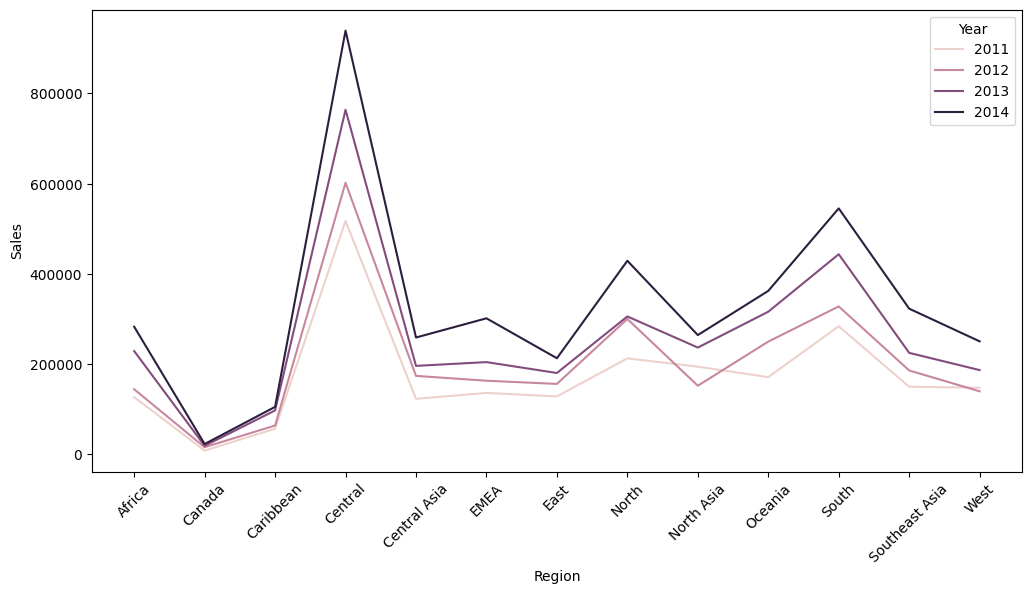

In [40]:
Reg = df.groupby(['Year', 'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Region', y='Sales', hue='Year', data = Reg)
plt.xticks(rotation = 45)

#### Product Analysis:
    - Which products are the best-sellers in terms of quantity sold?
    - Are there any products that consistently underperform or outperform?
    - What is the relationship between discounts and the quantity of products sold?

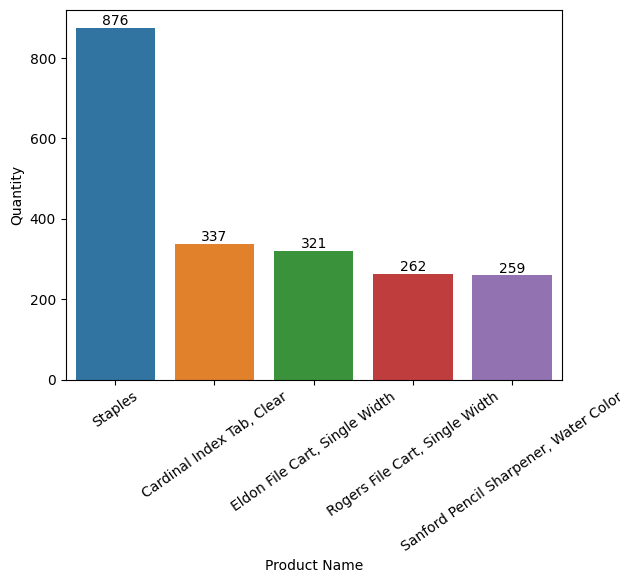

In [290]:
best_product_sold = df.groupby(['Product Name'])['Quantity']\
.sum().sort_values(ascending = False).head(5).reset_index()
sns = sns.barplot(x = 'Product Name', y = 'Quantity', data = best_product_sold)
plt.xticks(rotation = 35)
for bars in sns.containers:
    sns.bar_label(bars)


          Discount  Quantity
Discount  1.000000 -0.019875
Quantity -0.019875  1.000000


<Axes: xlabel='Quantity', ylabel='Discount'>

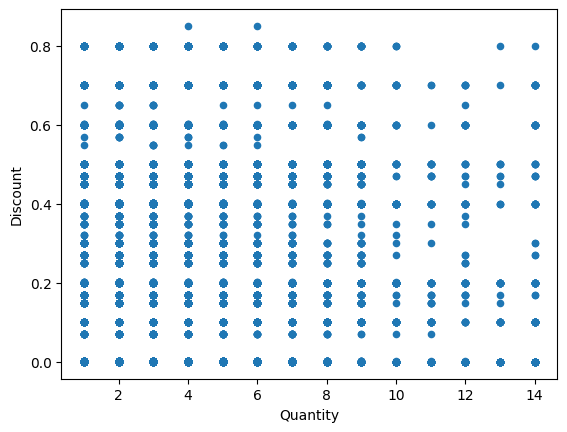

In [42]:
data = df[['Discount', 'Quantity']]
print(data.corr())
data.plot(kind = 'scatter', y = 'Discount', x = 'Quantity')

#### Discount Analysis:
    - What is the overall impact of discounts on total sales and profit?

In [225]:
sales_wd = df[df['Discount'] > 0]['Sales'].sum()
sales_wod = df[df['Discount'] == 0]['Sales'].sum()
profit_wd = df[df['Discount'] > 0]['Profit'].sum()
profit_wod = df[df['Discount'] == 0]['Profit'].sum()
print(f"Total Sales with Discount: {sales_wd}")
print(f"Total Sales without Discount: {sales_wod}")
print(f"Total Profit with Discount: {profit_wd}")
print(f"Total Profit without Discount: {profit_wod}")

Total Sales with Discount: 5650090.95988
Total Sales without Discount: 6992410.95
Total Profit with Discount: -303237.98192000005
Total Profit without Discount: 1770695.2732000002
